In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load dataset

data =pd.read_csv("cancer_expression.csv")

data.head(13)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20
5,Gene6,94,71,23,24,75,56,37,44,43,...,36,13,23,52,84,7,24,28,58,37
6,Gene7,86,70,58,39,84,65,45,37,72,...,31,25,34,32,68,73,65,52,23,8
7,Gene8,41,28,97,50,57,99,64,67,89,...,37,13,47,52,43,97,46,30,54,29
8,Gene9,20,18,80,91,19,96,70,36,91,...,9,72,10,98,51,59,44,56,20,17
9,Gene10,66,27,13,16,5,62,5,38,52,...,98,66,73,80,20,94,94,52,89,43


In [90]:
control_cols = [i for i in data.columns if "Control" in i]
treatment_cols = [i for i in data.columns if "Treatment" in i]
#gene_row = [row for row in data.rows if "gene" in row]
#print("gene_rows")
print("Column of Controls:")
print(control_cols)
print("Column of Treatments:")
print(treatment_cols)


Column of Controls:
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']
Column of Treatments:
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


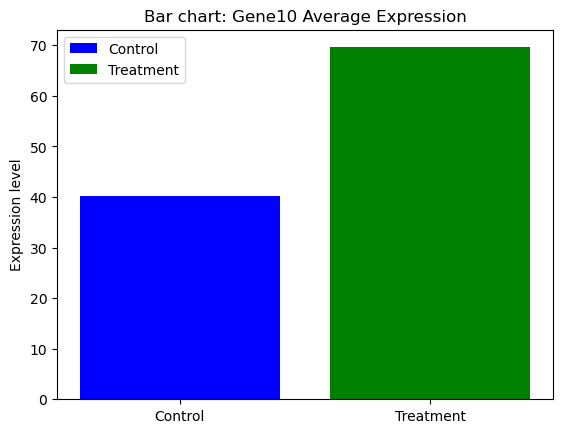

In [92]:
#select the gene row
gene = 'Gene10'
gene_data = data[data['Gene'] == gene]

#compute average
control_mean = gene_data[control_cols].mean(axis=1).values[0]
treatment_mean = gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar('Control',control_mean, color = 'blue', label = 'Control')
plt.bar('Treatment',treatment_mean, color = 'green', label = 'Treatment')
plt.title(f"Bar chart: {gene} Average Expression")
plt.ylabel("Expression level")
plt.legend()
plt.show()

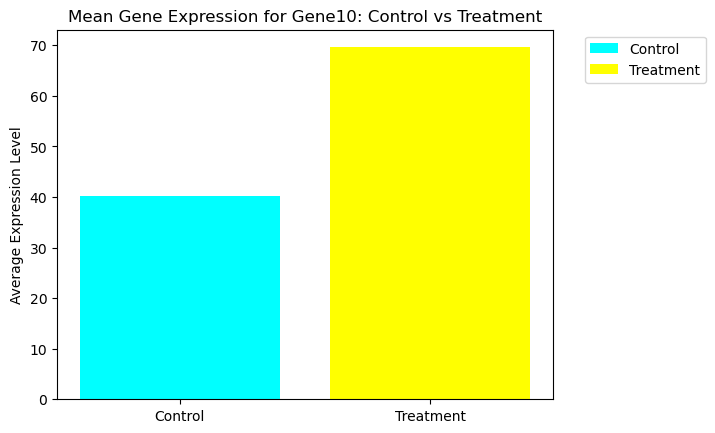

In [96]:
control_mean=gene_data[control_cols].mean(axis=1).iloc[0] 
treatment_mean=gene_data[treatment_cols].mean(axis=1).iloc[0] 

bars=plt.bar(['Control','Treatment'],
             [control_mean,treatment_mean],
             color=['cyan','yellow'])

plt.ylabel('Average Expression Level')
plt.title(f'Mean Gene Expression for {gene}: Control vs Treatment')
plt.legend(bars,['Control','Treatment'],
           bbox_to_anchor=(1.05,1),
           loc='upper left')
plt.show()

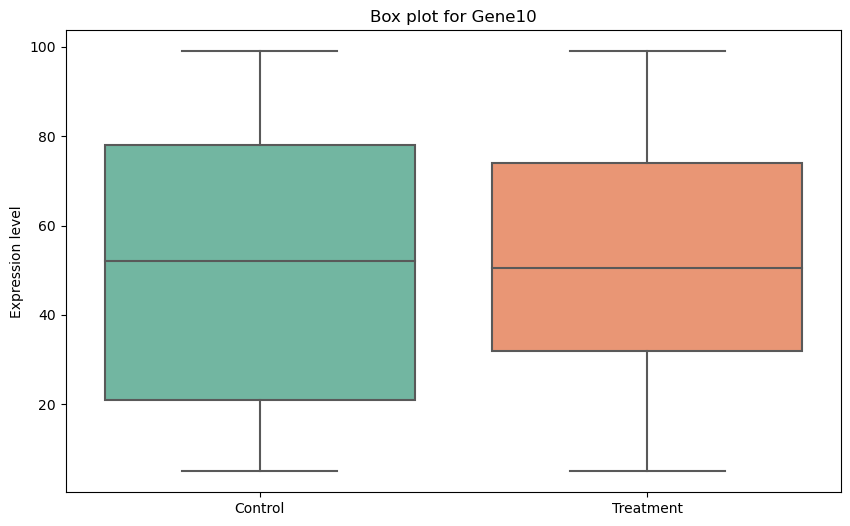

In [97]:
control_data = data[['Control1','Control2']].values.flatten()
treatment_data = data[['Treatment1','Treatment2']].values.flatten()

plt.figure(figsize = (10,6))
sns.boxplot(data = [control_data, treatment_data], palette = 'Set2')

plt.xticks([0,1],['Control','Treatment'])
plt.title(f"Box plot for {gene}")
plt.ylabel('Expression level')
plt.show()

Text(0.5, 1.0, 'Violin plot: Gene2 Expression Distribution')

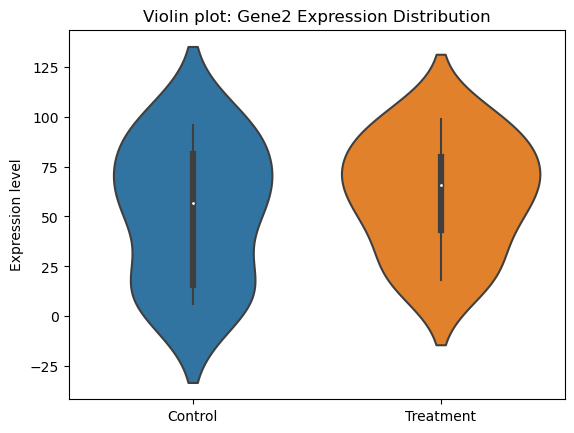

In [107]:
gene = 'Gene2'
gene_row = data[data["Gene"] == gene].iloc[0]

data = [gene_row[control_cols].values, gene_row[treatment_cols].values]

sns.violinplot(data = data)
plt.xticks([0,1],['Control','Treatment'])
plt.ylabel("Expression level")
plt.title(f"Violin plot: {gene} Expression Distribution")

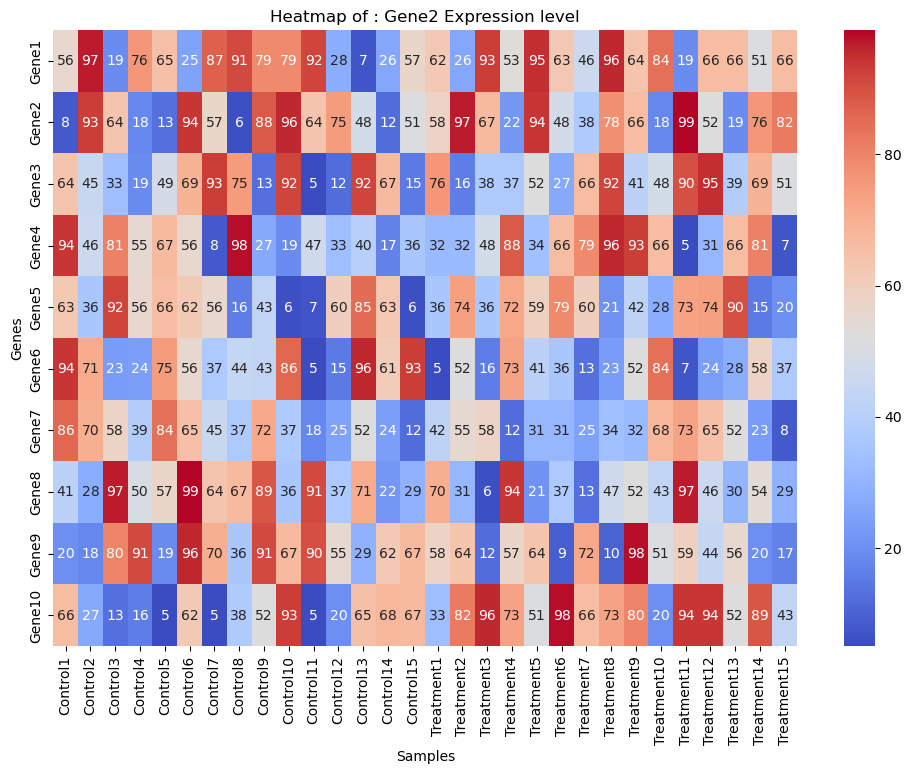

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = data.set_index('Gene') #set gene as row
heatmap = heatmap_data.head(10)

plt.figure(figsize = (12,8))
sns.heatmap(heatmap, cmap = "coolwarm", annot = True)
plt.title(f"Heatmap of : {gene} Expression level")
plt.xlabel('Samples')
plt.ylabel("Genes")
plt.show()